In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys 
sys.path.append('../utils')
import classifier_utils
import plot_utils

In [2]:
data_path = "../../data/fine-tuning/"

# Load Data

In [3]:
metadata_df = pd.read_csv(data_path + "moravian_deu_metadata.csv", index_col=0)
metadata_df

,gender,birth,death,birthplace_lat,birthplace_long
id,,,,,
0,male,1725,1792,49.650000,17.933333
1,female,1742,1761,41.083333,-74.983333
2,female,1734,1791,50.966667,8.316667
3,male,1732,1789,54.950000,8.866667
4,female,1668,1748,40.666667,-75.333333
5,female,1724,1782,50.216667,8.266667
6,male,1714,1792,49.450000,11.083333
7,male,1719,1786,51.100000,10.650000
8,male,1690,1762,51.050000,13.733333


In [4]:
df = pd.concat([
    pd.read_csv(data_path + "moravian_deu_train.csv"),
    pd.read_csv(data_path + "moravian_deu_test.csv") 
])
df

,source,text,label
0,11,Ich küßte Ihm im Geist die Hand mit ihren Näge...,positive
1,37,Ihm warst du ganz geweiht!,positive
2,19,Ein Soldaten Bruder der bey meinem Meister im ...,positive
3,34,So weit ihr eigener Aufsatz.,neutral
4,21,da er noch ein paar Jahr als Gärtner u. nun 23...,negative
...,...,...,...
437,9,Die lezte Zeit kränckelte er.,negative
438,38,Ich sahe sie oft auf ihrem Angesicht liegen un...,positive
439,13,Ich bat den Heiland mein Herz mit seinem Blute...,positive
440,34,nie hört’ man dich klagen;,positive


## Add Polarity Score

In [5]:
df["polarity"] = df["label"].apply(lambda x: classifier_utils.get_polarity(x))
df

,source,text,label,polarity
0,11,Ich küßte Ihm im Geist die Hand mit ihren Näge...,positive,1
1,37,Ihm warst du ganz geweiht!,positive,1
2,19,Ein Soldaten Bruder der bey meinem Meister im ...,positive,1
3,34,So weit ihr eigener Aufsatz.,neutral,0
4,21,da er noch ein paar Jahr als Gärtner u. nun 23...,negative,-1
...,...,...,...,...
437,9,Die lezte Zeit kränckelte er.,negative,-1
438,38,Ich sahe sie oft auf ihrem Angesicht liegen un...,positive,1
439,13,Ich bat den Heiland mein Herz mit seinem Blute...,positive,1
440,34,nie hört’ man dich klagen;,positive,1


# Aggregate Sentiment and Join Gender Metadata

In [6]:
df = df.groupby("source").mean("label").join(metadata_df[["gender"]])
df

,polarity,gender
source,,
0,0.318182,male
1,0.129032,female
2,0.181818,female
3,0.100917,male
4,0.074074,female
5,0.229008,female
6,0.136364,male
7,0.200000,male
8,-0.043478,male


# Get Model Predictions

In [7]:
prediction_path = "../../data/predictions/"

## Off-the-shelf Lexicon-based Approaches

### SentiWS

In [8]:
sentiws_df = pd.concat([
    pd.read_csv(prediction_path + "moravian_deu_train_SentiWS.csv", index_col=0),
    pd.read_csv(prediction_path + "moravian_deu_test_SentiWS.csv", index_col=0) 
]).rename(columns={"polarity": "SentiWS"})

sentiws_df = sentiws_df.groupby("source").mean("label").join(metadata_df[["gender"]])
sentiws_df

,SentiWS,gender
source,,
0,0.000828,male
1,0.005154,female
2,0.004402,female
3,0.003852,male
4,0.001577,female
5,0.003055,female
6,0.005647,male
7,0.000445,male
8,0.001915,male


### GerVADER

In [9]:
gervader_df = pd.concat([
    pd.read_csv(prediction_path + "moravian_deu_train_GerVADER.csv", index_col=0),
    pd.read_csv(prediction_path + "moravian_deu_test_GerVADER.csv", index_col=0) 
]).rename(columns={"polarity": "GerVADER"})

gervader_df = gervader_df.groupby("source").mean("label").join(metadata_df[["gender"]])
gervader_df

,GerVADER,gender
source,,
0,0.223159,male
1,0.271668,female
2,0.129550,female
3,0.217322,male
4,0.180156,female
5,0.347359,female
6,0.182282,male
7,0.262644,male
8,0.055854,male


## Off-the-shelf Transformer Models

### ger-senti-bert

In [10]:
ger_senti_bert_df = pd.concat([
    pd.read_csv(prediction_path + "moravian_deu_train_ger-senti-bert.csv", index_col=0),
    pd.read_csv(prediction_path + "moravian_deu_test_ger-senti-bert.csv", index_col=0) 
])

ger_senti_bert_df["ger-senti-bert"] = ger_senti_bert_df["label"].apply(lambda x: classifier_utils.get_polarity(x))
ger_senti_bert_df = ger_senti_bert_df.groupby("source").mean("label").join(metadata_df[["gender"]])
ger_senti_bert_df

,ger-senti-bert,gender
source,,
0,0.000000,male
1,0.000000,female
2,0.000000,female
3,-0.036697,male
4,-0.037037,female
5,-0.030534,female
6,0.000000,male
7,-0.080000,male
8,-0.021739,male


### senti-distilbert

In [11]:
senti_distilbert_df = pd.concat([
    pd.read_csv(prediction_path + "moravian_deu_train_senti-distilbert.csv", index_col=0),
    pd.read_csv(prediction_path + "moravian_deu_test_senti-distilbert.csv", index_col=0) 
])

senti_distilbert_df["senti-distilbert"] = senti_distilbert_df["label"].apply(lambda x: classifier_utils.get_polarity(x))
senti_distilbert_df = senti_distilbert_df.groupby("source").mean("label").join(metadata_df[["gender"]])
senti_distilbert_df

,senti-distilbert,gender
source,,
0,0.181818,male
1,0.032258,female
2,0.272727,female
3,0.229358,male
4,0.000000,female
5,-0.221374,female
6,0.363636,male
7,-0.040000,male
8,-0.478261,male


## Fine-tuned Models

### bert*

In [12]:
finetuned_bert_path = "../../data/predictions/moravian_deu_test_bert_fine-tuned.csv"
finetuned_bert_df = pd.concat([
    pd.read_csv(prediction_path + "moravian_deu_train_bert_fine-tuned.csv", index_col=0),
    pd.read_csv(prediction_path + "moravian_deu_test_bert_fine-tuned.csv", index_col=0) 
])
finetuned_bert_df["bert*"] = finetuned_bert_df["label"].apply(lambda x: classifier_utils.get_polarity(x))
finetuned_bert_df = finetuned_bert_df.groupby("source").mean("label").join(metadata_df[["gender"]])
finetuned_bert_df

,bert*,gender
source,,
0,0.227273,male
1,-0.032258,female
2,0.090909,female
3,0.174312,male
4,0.222222,female
5,0.160305,female
6,0.181818,male
7,0.360000,male
8,0.108696,male


### gbert*

In [13]:
finetuned_gbert_df = pd.concat([
    pd.read_csv(prediction_path + "moravian_deu_train_gbert_fine-tuned.csv", index_col=0),
    pd.read_csv(prediction_path + "moravian_deu_test_gbert_fine-tuned.csv", index_col=0) 
])

finetuned_gbert_df["gbert*"] = finetuned_gbert_df["label"].apply(lambda x: classifier_utils.get_polarity(x))
finetuned_gbert_df = finetuned_gbert_df.groupby("source").mean("label").join(metadata_df[["gender"]])
finetuned_gbert_df

,gbert*,gender
source,,
0,0.318182,male
1,0.096774,female
2,0.227273,female
3,0.082569,male
4,0.259259,female
5,0.206107,female
6,0.181818,male
7,0.260000,male
8,-0.021739,male


### ger-senti-bert*

In [14]:
finetuned_ger_senti_bert_df = pd.concat([
    pd.read_csv(prediction_path + "moravian_deu_train_ger-senti-bert_fine-tuned.csv", index_col=0),
    pd.read_csv(prediction_path + "moravian_deu_test_ger-senti-bert_fine-tuned.csv", index_col=0) 
])

finetuned_ger_senti_bert_df["ger-senti-bert*"] = finetuned_ger_senti_bert_df["label"].apply(lambda x: classifier_utils.get_polarity(x))
finetuned_ger_senti_bert_df = finetuned_ger_senti_bert_df.groupby("source").mean("label").join(metadata_df[["gender"]])
finetuned_ger_senti_bert_df

,ger-senti-bert*,gender
source,,
0,0.272727,male
1,0.161290,female
2,0.363636,female
3,0.073394,male
4,0.148148,female
5,0.167939,female
6,0.181818,male
7,0.200000,male
8,-0.065217,male


# Join Dataframes

In [15]:
combined_df = df.rename(columns={"polarity": "manual"}).join(
        sentiws_df[["SentiWS"]]
    ).join(
        gervader_df[["GerVADER"]]
    ).join(
        ger_senti_bert_df[["ger-senti-bert"]]
    ).join(
        senti_distilbert_df[["senti-distilbert"]]
    ).join(
        finetuned_bert_df[["bert*"]]
    ).join(
        finetuned_gbert_df[["gbert*"]]
    ).join(
        finetuned_ger_senti_bert_df[["ger-senti-bert*"]]
    )
combined_df

,manual,gender,SentiWS,GerVADER,ger-senti-bert,senti-distilbert,bert*,gbert*,ger-senti-bert*
source,,,,,,,,,
0,0.318182,male,0.000828,0.223159,0.000000,0.181818,0.227273,0.318182,0.272727
1,0.129032,female,0.005154,0.271668,0.000000,0.032258,-0.032258,0.096774,0.161290
2,0.181818,female,0.004402,0.129550,0.000000,0.272727,0.090909,0.227273,0.363636
3,0.100917,male,0.003852,0.217322,-0.036697,0.229358,0.174312,0.082569,0.073394
4,0.074074,female,0.001577,0.180156,-0.037037,0.000000,0.222222,0.259259,0.148148
5,0.229008,female,0.003055,0.347359,-0.030534,-0.221374,0.160305,0.206107,0.167939
6,0.136364,male,0.005647,0.182282,0.000000,0.363636,0.181818,0.181818,0.181818
7,0.200000,male,0.000445,0.262644,-0.080000,-0.040000,0.360000,0.260000,0.200000
8,-0.043478,male,0.001915,0.055854,-0.021739,-0.478261,0.108696,-0.021739,-0.065217


# Melt and Plot

In [16]:
melted_df = combined_df.melt("gender", var_name="model", value_name="sentiment")
melted_df

,gender,model,sentiment
0,male,manual,0.318182
1,female,manual,0.129032
2,female,manual,0.181818
3,male,manual,0.100917
4,female,manual,0.074074
...,...,...,...
283,female,ger-senti-bert*,0.375000
284,female,ger-senti-bert*,0.415094
285,female,ger-senti-bert*,0.500000
286,female,ger-senti-bert*,0.382979


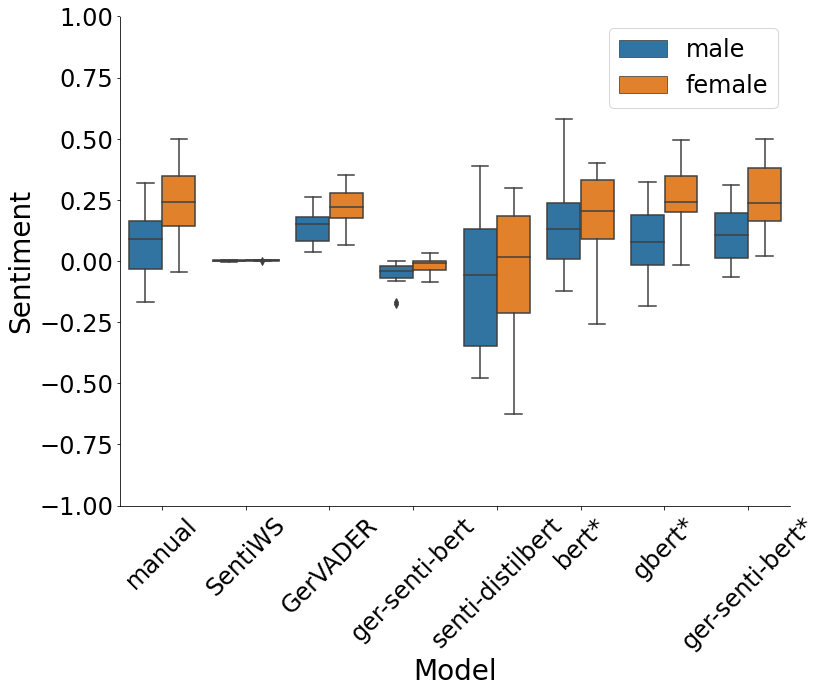

In [17]:
fig = plt.figure(figsize=(12,9))
ax = sns.boxplot(melted_df, x="model", y="sentiment", hue="gender")
plot_utils.format_boxplot(ax, "Model", "Sentiment");

## Plot Only Selected Models

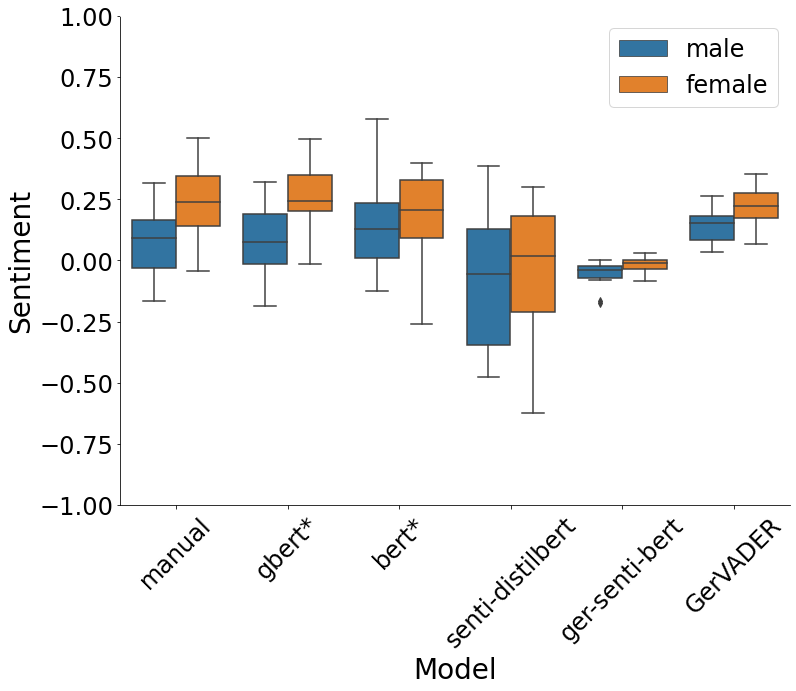

In [18]:
models = ["manual", "gbert*", "bert*", "senti-distilbert", "ger-senti-bert", "GerVADER"]

fig = plt.figure(figsize=(12,9))
ax = sns.boxplot(combined_df[models + ["gender"]].melt("gender", var_name="model", value_name="sentiment"), x="model", y="sentiment", hue="gender")
plot_utils.format_boxplot(ax, "Model", "Sentiment");